In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [56]:
sentiment_df= pd.read_csv("./Dataset/sentimentdataset.csv")

In [57]:
sentiment_df.shape

(732, 15)

In [169]:
sentiment_df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Cleaned_text,Vader_Score,Sentiment_range
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,enjoying beautiful day park,0.8074,positive
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,traffic terrible morning,-0.4767,negative
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,finished amazing workout,0.5859,positive
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,excited upcoming weekend getaway,0.3400,neutral
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,trying new recipe dinner tonight,0.0000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18,collaborating science project received recogni...,0.7845,positive
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14,attending surprise birthday party organized fr...,0.9538,positive
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17,successfully fundraising school charity initia...,0.9042,positive
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20,participating multicultural festival celebrati...,0.8910,positive


In [58]:
sentiment_df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [59]:
sentiment_df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [60]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [61]:
sentiment_df.isna().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [62]:
sentiment_df.duplicated().any()

np.False_

EDA

In [63]:
sentiment_df['Sentiment'].unique()

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

In [64]:
sentiment_df['Sentiment'].value_counts()

Sentiment
Positive           44
Joy                42
Excitement         32
Neutral            14
Contentment        14
                   ..
Adrenaline          1
Harmony             1
ArtisticBurst       1
Radiance            1
Elegance            1
Name: count, Length: 279, dtype: int64

<Axes: xlabel='Sentiment'>

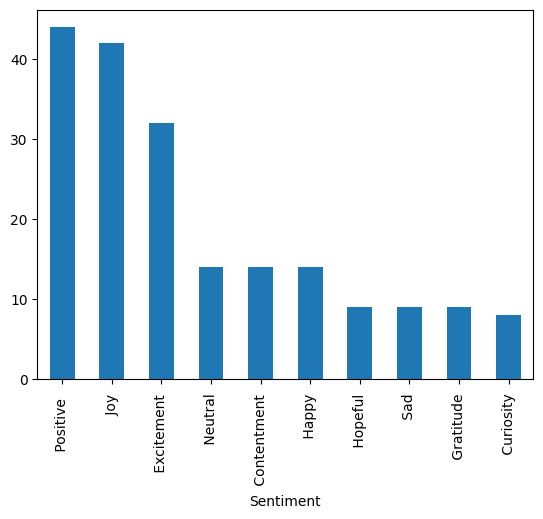

In [65]:
sentiment_df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')

In [66]:
sentiment_df['Platform'].value_counts()

Platform
Instagram     258
Facebook      231
Twitter       128
Twitter       115
Name: count, dtype: int64

In [67]:
sentiment_df['Platform'] = sentiment_df['Platform'].str.strip()

In [68]:
sentiment_df['Platform'].value_counts()

Platform
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64

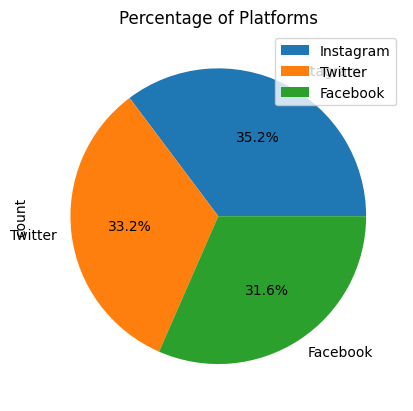

In [69]:
sentiment_df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Platforms')
plt.legend()
plt.show()

In [70]:
sentiment_df['Country'].value_counts()

Country
USA               59
USA               55
UK                49
Canada            44
Australia         41
                  ..
Netherlands        1
USA                1
Germany            1
France             1
USA                1
Name: count, Length: 115, dtype: int64

In [80]:
sentiment_df['Country'].nunique()

33

In [75]:
sentiment_df['Country'] = sentiment_df['Country'].str.strip()

In [92]:
sentiment_df['Country'].value_counts()

Country
USA               188
UK                143
Canada            135
Australia          75
India              70
Brazil             17
France             16
Japan              15
Germany            14
Italy              11
Spain               6
South Africa        6
Greece              5
Netherlands         4
Switzerland         3
Portugal            2
Austria             2
Belgium             2
Denmark             2
Czech Republic      2
Sweden              2
Colombia            1
Scotland            1
Kenya               1
Jamaica             1
Ireland             1
China               1
Norway              1
Cambodia            1
Maldives            1
Peru                1
Jordan              1
Thailand            1
Name: count, dtype: int64

<Axes: xlabel='Country'>

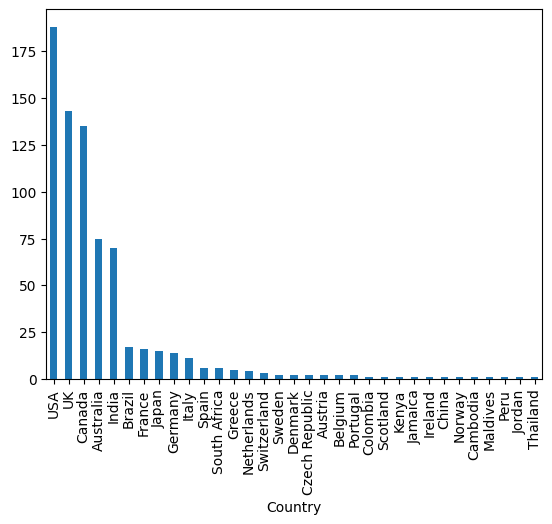

In [87]:
sentiment_df['Country'].value_counts().nlargest(33).plot(kind='bar')

Text Preprocessing

In [115]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [152]:

# Download NLTK data 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')  # For lemmatization
nltk.download('omw-1.4')
nltk.download('vader_lexicon')


# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lm = WordNetLemmatizer()

# Function for text preprocessing
 
def text_transformation(text):
    clean_text = []
    for item in text:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        clean_text.append(' '.join(str(x) for x in new_item))
    return clean_text
sentiment_df["Cleaned_text"] = text_transformation(sentiment_df['Text'])


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aishwaryakarki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aishwaryakarki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aishwaryakarki/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/aishwaryakarki/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aishwaryakarki/nltk_data...


In [138]:
sentiment_df['Cleaned_text']

0                            enjoying beautiful day park
1                               traffic terrible morning
2                               finished amazing workout
3                       excited upcoming weekend getaway
4                       trying new recipe dinner tonight
                             ...                        
727    collaborating science project received recogni...
728    attending surprise birthday party organized fr...
729    successfully fundraising school charity initia...
730    participating multicultural festival celebrati...
731    organizing virtual talent show challenging tim...
Name: Cleaned_text, Length: 732, dtype: object

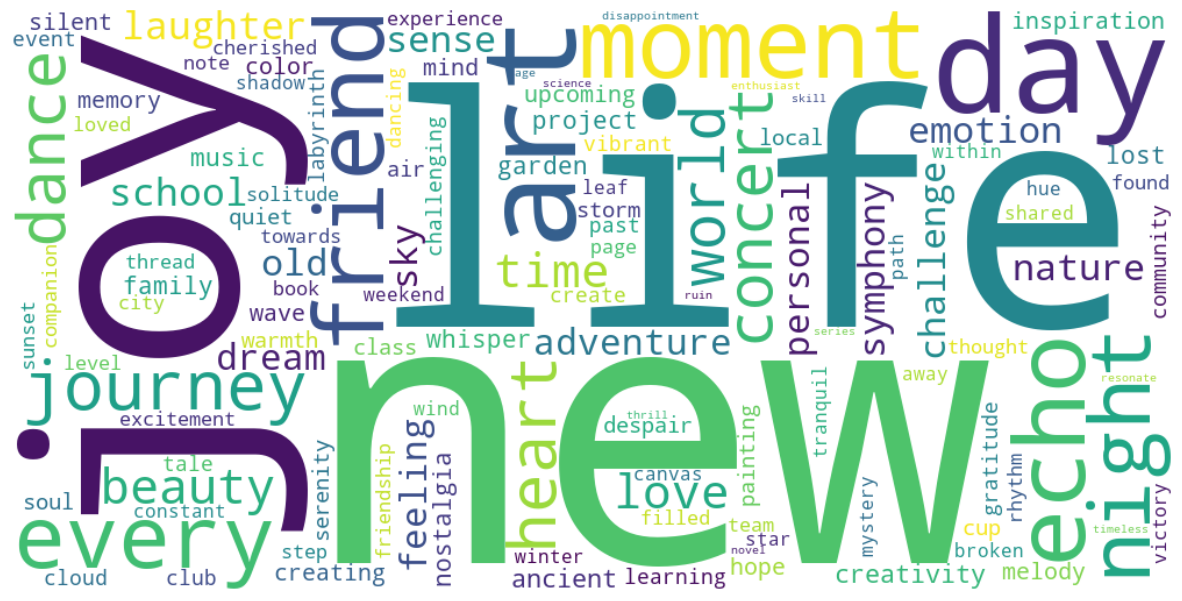

In [139]:

# Create the word cloud from the text data
word_cloud = ""
for row in sentiment_df['Cleaned_text']:
    for word in row:
        word_cloud += " ".join(word)

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', min_font_size=10).generate(word_cloud)

# Set the size of the figure
plt.figure(figsize=(15, 8))  # Adjust the size here (width, height in inches)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

In [142]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [170]:
analyzer = SentimentIntensityAnalyzer()


sentiment_df['Vader_Score'] = sentiment_df['Cleaned_text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

sentiment_df['Sentiment_range'] = sentiment_df['Vader_Score'].apply(lambda score: 'positive' if score >= 0.3 else ('negative' if score <= -0.4 else 'neutral'))

print(sentiment_df[['Cleaned_text','Vader_Score', 'Sentiment_range']].head(750))

                                          Cleaned_text  Vader_Score  \
0                          enjoying beautiful day park       0.8074   
1                             traffic terrible morning      -0.4767   
2                             finished amazing workout       0.5859   
3                     excited upcoming weekend getaway       0.3400   
4                     trying new recipe dinner tonight       0.0000   
..                                                 ...          ...   
727  collaborating science project received recogni...       0.7845   
728  attending surprise birthday party organized fr...       0.9538   
729  successfully fundraising school charity initia...       0.9042   
730  participating multicultural festival celebrati...       0.8910   
731  organizing virtual talent show challenging tim...       0.7096   

    Sentiment_range  
0          positive  
1          negative  
2          positive  
3          positive  
4           neutral  
..             

Feature Extraction

tep 1: Text Preprocessing
Clean and preprocess the text data by performing the following tasks: - Tokenization: Split the text into individual tokens (words). - Stopword Removal: Remove common stopwords (e.g., 'the', 'is', 'and'). - Lemmatization or Stemming: Reduce words to their base forms (e.g., 'running' becomes 'run'). - Handle noisy content: Clean emojis, abbreviations, and slang.

Step 2: Feature Extraction
Apply two feature extraction techniques: 1. **Bag of Words (BoW)**: Convert the cleaned text data into a Bag of Words representation. 2. **TF-IDF (Term Frequency-Inverse Document Frequency)**: Apply the TF-IDF method to transform the text into numerical data.

Step 3: Model Training
Train two machine learning models for sentiment classification: 1. **Naive Bayes**: Use this probabilistic model to classify the sentiment. 2. **Support Vector Machines (SVM)**: Train an SVM model for sentiment classification. Use the features extracted from both BoW and TF-IDF techniques.

Step 4: Model Evaluation
Evaluate the performance of both models using the following metrics: - Accuracy - Precision - Recall - F1-Score Additionally, visualize the results using a confusion matrix.

Step 5: Report
Write a report summarizing your approach and results. The report should include the following sections: - Text preprocessing techniques applied - Feature extraction process using BoW and TF-IDF - Model training and performance evaluation - Comparison of results between BoW and TF-IDF models - Challenges faced and recommendations for improvement
Submission Guidelines
Submit the following work in ONE pdf file: - Python code for preprocessing, feature extraction, model training, and evaluation - Trained models (Naive Bayes and SVM) - A report in PDF format Ensure your code is well-documented with comments explaining each step.

In [229]:
bow_vectorizer = CountVectorizer(ngram_range=(1,2),max_features=1000)
X_bow = bow_vectorizer.fit_transform(sentiment_df['Cleaned_text'])

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(sentiment_df['Cleaned_text'])

y = sentiment_df['Sentiment_range'].apply(lambda x: 0 if x == "negative" else (1 if x == 'neutral' else 2))

Model Training

Step 3: Model Training
Train two machine learning models for sentiment classification:

 1. **Naive Bayes**: Use this probabilistic model to classify the sentiment.

 2. **Support Vector Machines (SVM)**: Train an SVM model for sentiment classification.

 Use the features extracted from both BoW and TF-IDF techniques.

In [230]:
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _,_ =train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [231]:
naiveb_bow = MultinomialNB()
naiveb_bow.fit(X_train_bow, y_train)

MultinomialNB()

In [232]:
naiveb_tfidf = MultinomialNB()
naiveb_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [260]:
svm_bow = SVC(kernel='linear')
svm_bow.fit(X_train_bow, y_train)

SVC(kernel='linear')

In [261]:
svm_tfidf = SVC(kernel='linear')
svm_tfidf.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [262]:
def eval_model(model, X_test, y_test, model_name, classification_report):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    classification_report_test = classification_report(y_test, y_pred)

    
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize = (6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap= 'Blues', xticklabels= ['Negative', 'Neutral','Positive'],yticklabels= ['Negative', 'Neutral','Positive'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    print(f'{model_name}-Accuracy :{accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall :.2f}, F1-Score: {f1:.2f}, \nclassification-report:\n {classification_report_test}')
    

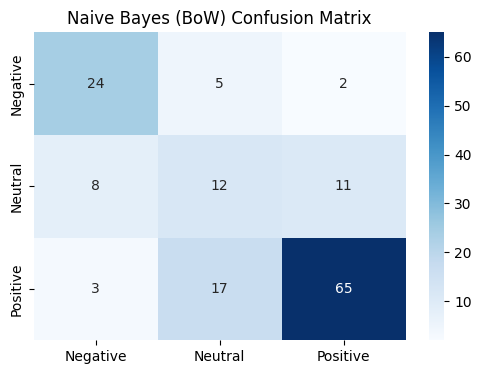

Naive Bayes (BoW)-Accuracy :0.69, Precision: 0.70, Recall: 0.69, F1-Score: 0.69, 
classification-report:
               precision    recall  f1-score   support

           0       0.69      0.77      0.73        31
           1       0.35      0.39      0.37        31
           2       0.83      0.76      0.80        85

    accuracy                           0.69       147
   macro avg       0.62      0.64      0.63       147
weighted avg       0.70      0.69      0.69       147



In [263]:
eval_model(naiveb_bow, X_test_bow, y_test, 'Naive Bayes (BoW)',classification_report)

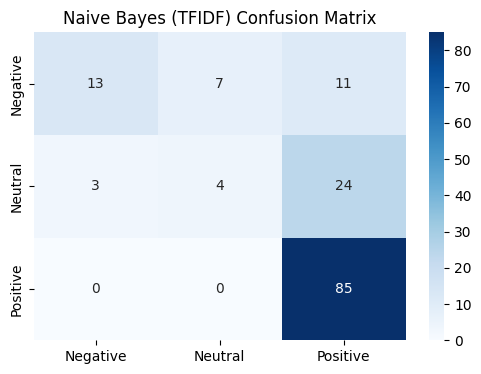

Naive Bayes (TFIDF)-Accuracy :0.69, Precision: 0.66, Recall: 0.69, F1-Score: 0.64, 
classification-report:
               precision    recall  f1-score   support

           0       0.81      0.42      0.55        31
           1       0.36      0.13      0.19        31
           2       0.71      1.00      0.83        85

    accuracy                           0.69       147
   macro avg       0.63      0.52      0.52       147
weighted avg       0.66      0.69      0.64       147



In [264]:
eval_model(naiveb_tfidf, X_test_tfidf, y_test, 'Naive Bayes (TFIDF)', classification_report)

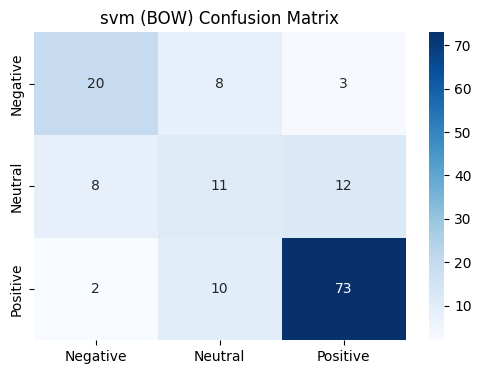

svm (BOW)-Accuracy :0.71, Precision: 0.70, Recall: 0.71, F1-Score: 0.70, 
classification-report:
               precision    recall  f1-score   support

           0       0.67      0.65      0.66        31
           1       0.38      0.35      0.37        31
           2       0.83      0.86      0.84        85

    accuracy                           0.71       147
   macro avg       0.63      0.62      0.62       147
weighted avg       0.70      0.71      0.70       147



In [265]:
eval_model(svm_bow, X_test_bow, y_test, 'svm (BOW)', classification_report)

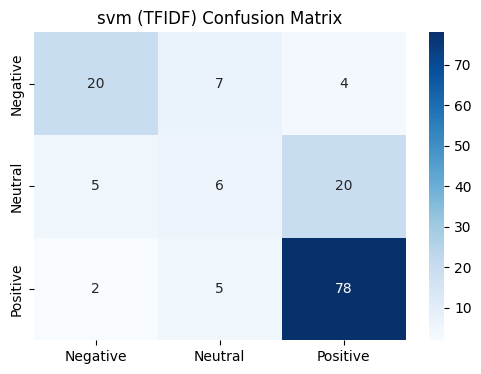

svm (TFIDF)-Accuracy :0.71, Precision: 0.67, Recall: 0.71, F1-Score: 0.68, 
classification-report:
               precision    recall  f1-score   support

           0       0.74      0.65      0.69        31
           1       0.33      0.19      0.24        31
           2       0.76      0.92      0.83        85

    accuracy                           0.71       147
   macro avg       0.61      0.59      0.59       147
weighted avg       0.67      0.71      0.68       147



In [266]:
eval_model(svm_tfidf, X_test_tfidf, y_test, 'svm (TFIDF)',classification_report)